In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## read the dataset 

In [2]:
import pandas as pd 
df=pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## profit(Y) ~ RND(X1) , ADMIN(X2) AND MKT (X3)
## PROFIT = B0+ B1*RND + B2+ADMIN + B3+MKT

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

# separating x and y

In [9]:
x = df[['RND','ADMIN','MKT']]
y = df[['PROFIT']]

In [10]:
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


# create a linear regression model

In [11]:
from sklearn.linear_model import  LinearRegression
model= LinearRegression()
model.fit(x,y)

LinearRegression()

## check interceept and coefficient

In [12]:
model.intercept_

array([50122.19298987])

In [13]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [14]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [16]:
coef=pd.Series(model.coef_.flatten())
coef.index=x.columns
coef



RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: title={'center': 'coefficient linmear regression'}>

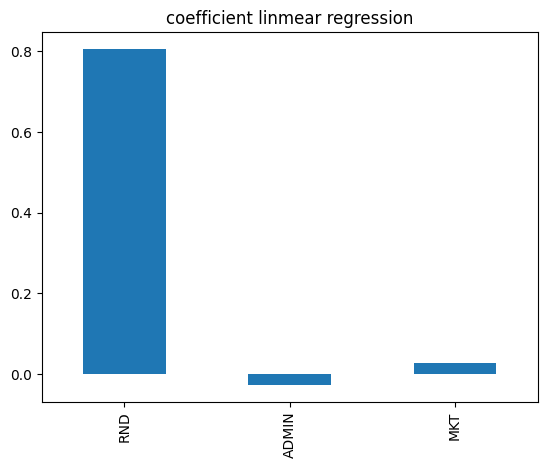

In [17]:
coef.plot(kind='bar',title='coefficient linmear regression')

## evalute the model

In [18]:
# r2 score 
model.score(x,y)

0.9507459940683246

## predict the value of x

In [19]:
ypred=model.predict(x)

In [22]:
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [23]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## MSE , RMSE , MAE , R2 

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [25]:
mse=mean_squared_error(y,ypred)
mse


78417126.01913083

In [26]:
RMSE= mse**(1/2)
RMSE

8855.34448901514

In [27]:
mae= mean_absolute_error(y,ypred)
mae

6471.4503961048085

In [28]:
from sklearn.metrics import r2_score
r2= r2_score(y,ypred)
r2

0.9507459940683246

In [30]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y,ypred)
mape

0.10601209160494125

## above model is good and use for out of sample predictions

In [31]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [33]:
xnew=[[80000 , 50000, 50000]]
model.predict(xnew)

array([[114600.00180343]])